In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
from tqdm import tqdm

In [2]:
# read organized/preprocessed dataframes
co_purchased = pd.read_feather('./Data/co_purchased.ftr')
products = pd.read_feather('./Data/products.ftr')
reviews = pd.read_feather('./Data/reviews.ftr')
dataset = pd.read_feather('./Data/dataset.ftr')

In [3]:
products.columns

Index(['product_id', 'title', 'group', 'salesrank', 'co_purchased_num',
       'categories', 'reviews_num', 'avg_rate', 'first_rating_time',
       'last_rating_time', 'highest_rate', 'lowest_rate'],
      dtype='object')

In [4]:
reviews.columns

Index(['product_id', 'customer_id', 'votes_num', 'helpful_num', 'time',
       'rating'],
      dtype='object')

In [5]:
co_purchased.columns

Index(['first', 'second'], dtype='object')

In [6]:
# select products ID where avg_rate > 4 and lowest_rate > 3
products.loc[(products['avg_rate']>4) & (products['lowest_rate']>3), 'product_id']

0         0827229534
2         0486287785
5         B00000AU3R
8         0871318237
15        3895780812
             ...    
402716    B000065AHM
402718    1930519206
402719    B000059TOC
402722    B00008DDST
402723    B00005MHUG
Name: product_id, Length: 175092, dtype: object

In [7]:
# select groups of the products that are bought by the customer 'A11NCO6YTE4BTJ'
products.loc[products['product_id'].isin(reviews.loc[reviews['customer_id']=='A11NCO6YTE4BTJ', 'product_id']), 'group']

1         Book
29010     Book
94978     Book
102197    Book
127105    Book
171963    Book
Name: group, dtype: object

In [17]:
# calculate the time of writing three tables with feather and csv
%time co_purchased.to_feather('./Data/co_purchased.ftr')
%time co_purchased.to_csv('./Data/co_purchased.csv')

%time products.to_feather('./Data/products.ftr')
%time products.to_csv('./Data/products.csv')

%time reviews.to_feather('./Data/reviews.ftr')
%time reviews.to_csv('./Data/reviews.csv')

Wall time: 262 ms
Wall time: 2.77 s
Wall time: 530 ms
Wall time: 14.5 s
Wall time: 1.03 s
Wall time: 17.5 s


In [19]:
# calculate the time of reading three tables with feather and csv files
%time co_purchased = pd.read_feather('./Data/co_purchased.ftr')
%time co_purchased = pd.read_csv('./Data/co_purchased.csv')

%time products = pd.read_feather('./Data/products.ftr')
%time products = pd.read_csv('./Data/products.csv')

%time reviews = pd.read_feather('./Data/reviews.ftr')
%time reviews = pd.read_csv('./Data/reviews.csv')

Wall time: 442 ms
Wall time: 918 ms
Wall time: 530 ms
Wall time: 1.3 s
Wall time: 1.37 s
Wall time: 4.42 s


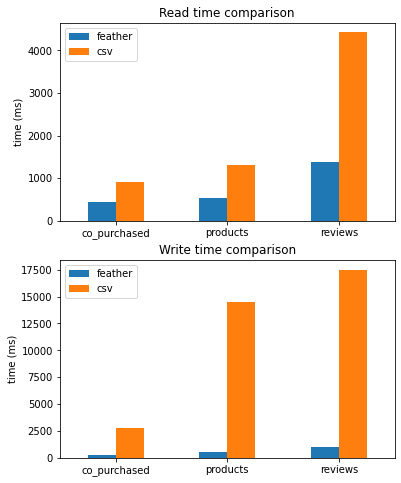

In [62]:
# plot the time comparison
fig, (ax1, ax2) = plt.subplots(2, figsize=(6, 8))

df = pd.DataFrame()
df['table'] = ['co_purchased', 'products', 'reviews']
df['feather'] = [442, 530, 1370]
df['csv'] = [918, 1300, 4420]
df.plot.bar(ax=ax1)
ax1.set_ylabel('time (ms)')
ax1.set_xticklabels(df['table'], rotation=0)
ax1.set_title('Read time comparison')

df = pd.DataFrame()
df['table'] = ['co_purchased', 'products', 'reviews']
df['feather'] = [262, 530, 1030]
df['csv'] = [2770, 14500, 17500]
df.plot.bar(ax=ax2)
ax2.set_ylabel('time (ms)')
ax2.set_xticklabels(df['table'], rotation=0)
ax2.set_title('Write time comparison')

plt.show()

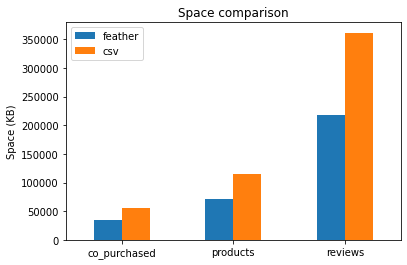

In [66]:
# plot the space comparison
fig, (ax1) = plt.subplots(1, figsize=(6, 4))

df = pd.DataFrame()
df['table'] = ['co_purchased', 'products', 'reviews']
df['feather'] = [34511, 71275, 217300]
df['csv'] = [56421, 114921, 361551]
df.plot.bar(ax=ax1)
ax1.set_ylabel('Space (KB)')
ax1.set_xticklabels(df['table'], rotation=0)
ax1.set_title('Space comparison')

plt.show()